# Data Cleaning and Exploratory Data Analysis (EDA) on Titanic Dataset

## Import libraries:

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset:

In [22]:
# Load the Titanic dataset
df=pd.read_csv("train.csv")

## Analysis:

In [23]:
# Display the first few rows of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [26]:
# Check for missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Cleaning:

In [27]:
# Drop columns with too many missing values
df = df.drop(columns=['Cabin'])

# Fill missing values in 'Age' with the mean age
df['Age'] = df['Age'].fillna(df['Age'].mean())
# Fill missing values in 'Embarked' with the most frequent value
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [28]:
# Convert non-numeric entries to NaN (if any) and then handle NaN values
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

## Descriptive Statistics

In [29]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


-----

# Data Visualization:

### Survival Rate Distribution

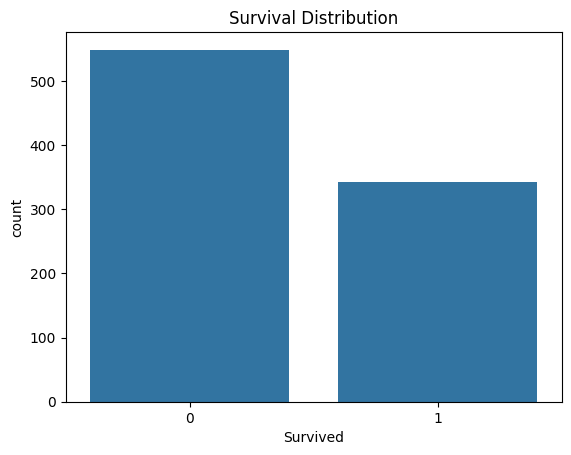

In [30]:
# Plot the distribution of survival
sns.countplot(data=df, x='Survived')
plt.title('Survival Distribution')
plt.show()

### Insights:

The count plot shows the distribution of survival (0 = Not Survived, 1 = Survived). We observe the number of survivors and non-survivors.

- The bar on the left represents the count of passengers who did not survive, which is significantly higher than the bar on the right.
- The bar on the right represents the count of passengers who survived, which is lower than the count of those who did not survive.

 ### Survival Rate by Pclass

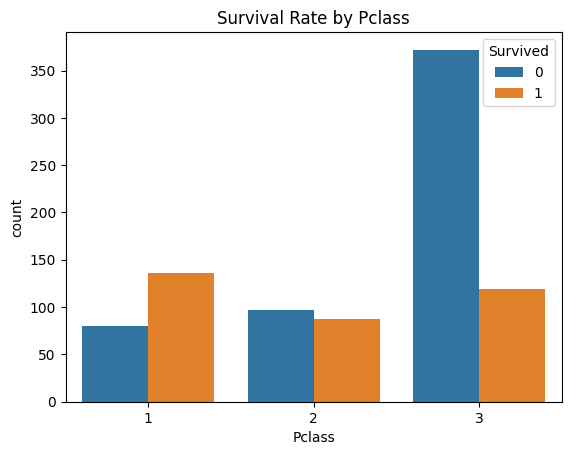

In [31]:
# Plot survival rate by passenger class
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival Rate by Pclass')
plt.show()

**Passenger Class (Pclass)** :
- The chart displays data for three Pclass categories: 1, 2, and 3.

**Survival Rates**:
- The survival rate is highest for Pclass 1, with a larger orange bar (representing survivors) compared to the blue bar (representing non-survivors).
- The survival rate decreases for Pclass 2 and is lowest for Pclass 3, where the blue bar (representing non-survivors) is taller than the orange bar (representing survivors).

### Age Distribution:

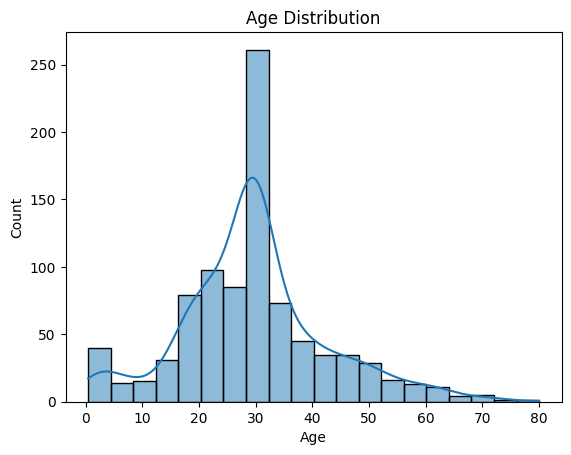

In [32]:
# Age distribution plot
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

- The plot has a distinct peak around the 20-30 age range, indicating that the majority of passengers were in this age group.
- There are also smaller peaks around the 5-10 and 45-50 age ranges.
- The distribution overall is right-skewed, with more passengers in the younger age groups compared to the older age groups.

### Age vs Fare and Survival

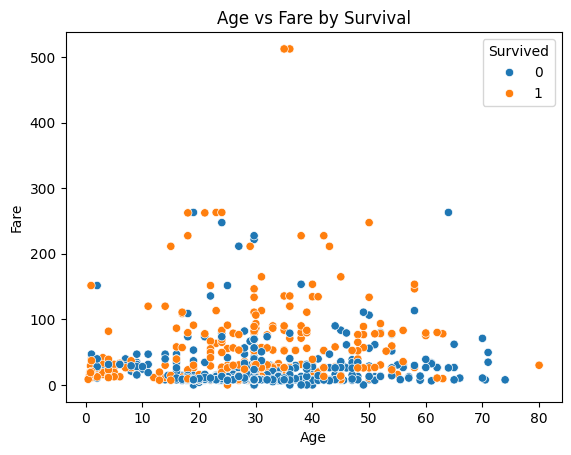

In [33]:
# Scatter plot of Age vs Fare with survival information
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived')
plt.title('Age vs Fare by Survival')
plt.show()

### Insights:

**Age vs Fare**:
- Younger passengers (under 20 years old) tend to have lower fares, while older passengers have a wider range of fares.

**Survival Status**:
- The blue points represent passengers who did not survive, while the orange points represent passengers who survived.
- Survivors tend to be distributed across a wider range of fares and ages compared to those who did not survive.
- 
**Outliers**:
- There are a few outlier points with extremely high fares, both for survivors and non-survivors.

### Survival rate by Sex

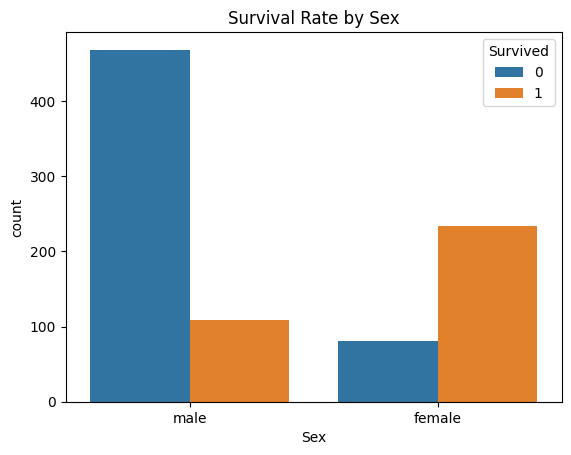

In [34]:
# plot Survival rate by Sex
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival Rate by Sex')
plt.show()

- The survival rate is higher for female passengers compared to male passengers.
- For female passengers, the orange bar (representing those who survived) is taller than the blue bar (representing those who did not survive).
- For male passengers, the blue bar (representing those who did not survive) is taller than the orange bar (representing those who survived).

 ### Survival Rate by Embarked Location

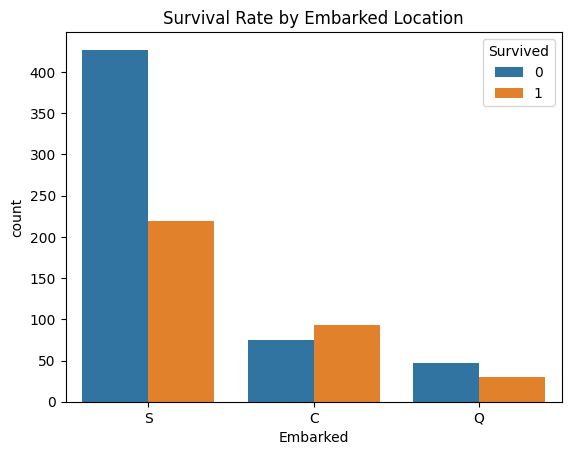

In [35]:
# plot Survival Rate by Embarked Location
sns.countplot(data=df, x='Embarked', hue='Survived')
plt.title('Survival Rate by Embarked Location')
plt.show()

 ### Insights:

1. **Embarked Location**:
- 'S' represents the location where the most passengers embarked, with a total count of around 370.
- 'C' and 'Q' have significantly lower total counts compared to 'S'.
2. **Survival Rate**:
- For the 'S' location, the survival rate is higher for passengers who survived (orange bar) compared to those who did not (blue bar).
- For the 'C' and 'Q' locations, the survival rate is lower for passengers who survived (orange bars) compared to those who did not (blue bars).

# Pivot Tables

In [36]:
# Pclass and Survival Rate
pclass_survival = df.pivot_table(index='Pclass', values='Survived', aggfunc='mean')
print(pclass_survival)

        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


In [37]:
# Sex and Survival Rate
sex_survival = df.pivot_table(index='Sex', values='Survived', aggfunc='mean')
print(sex_survival)

        Survived
Sex             
female  0.742038
male    0.188908


### Survival Rate by Age Binned

         Survived
age_bin          
0-12     0.579710
13-18    0.428571
19-30    0.331096
31-50    0.423237
51+      0.343750


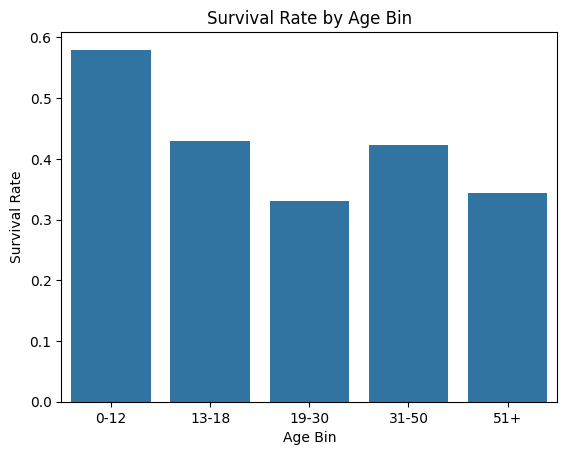

In [38]:
# create Age bins
df['age_bin'] = pd.cut(df['Age'], bins=[0, 12, 18, 30, 50, 100], labels=['0-12', '13-18', '19-30', '31-50', '51+'])

# Pivot table with observed=False to include all bins
age_survival = df.pivot_table(index='age_bin', values='Survived', aggfunc='mean', observed=False)
print(age_survival)

# Plot survival rate by age bins
sns.barplot(x=age_survival.index, y=age_survival['Survived'])
plt.title('Survival Rate by Age Bin')
plt.xlabel('Age Bin')
plt.ylabel('Survival Rate')
plt.show()

### Insights:
- The survival rate is highest for the 0-12 age bin at around 0.58 or 58%.
- The survival rate decreases as the age bin increases, with the 51+ age bin having the lowest survival rate at around 0.29 or 29%.

### Survival Rate by Age Bin Heatmap

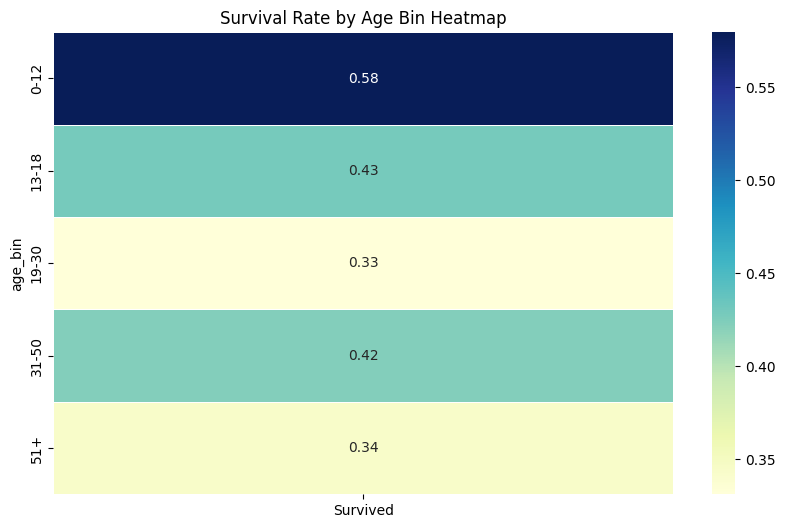

In [39]:
# Pivot table for survival rate by age bin with observed=False
age_survival_pivot = df.pivot_table(index='age_bin', values='Survived', aggfunc='mean', observed=False).reset_index()

# Create heatmap data
heatmap_data = age_survival_pivot.set_index('age_bin')

# Plot survival rate by age bins heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Survival Rate by Age Bin Heatmap')
plt.show()


### Insights:
  ### Survival Rate by Age Bin:
- The survival rate is highest (0.58) for the age bin of 0-12.
- The survival rate decreases as the age bin increases, with the lowest survival rate (0.33) for the age bin of 31-50.
 ### Color Coding:
- The survival rates are represented by a color gradient, with higher survival rates shown in darker shades of green and lower survival rates shown in lighter shades.

##  Pairplot for Numerical Variables

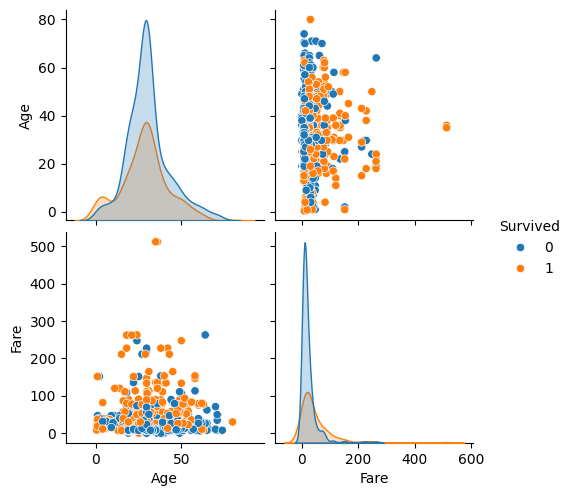

In [40]:
# Pairplot for numerical variables with hue based on survival
sns.pairplot(df[['Age', 'Fare', 'Survived']], hue='Survived')
#plt.title('Pairplot of Numerical Variables')
plt.show()

### Insights:
- **Age Distribution**: This subplot shows the distribution of passenger ages. The plot has a distinct peak around 25-30 years old, indicating that the majority of passengers were in this age range.
- **Fare Distribution**: This subplot shows the distribution of passenger fares. The plot has a bimodal distribution, with one peak around 0-100 fares and another peak around 400-500 fares. This suggests that there were a mix of passengers who paid lower and higher fares.
- **Survived vs. Fare**: This subplot shows the relationship between the passenger's survival status (0 for did not survive, 1 for survived) and their fare. The plot shows that passengers who survived generally paid higher fares, while those who did not survive had a wider range of fares.
- **Survived vs. Age**: This subplot shows the relationship between the passenger's survival status and their age. The plot suggests that younger passengers were more likely to survive compared to older passengers.
